## Neurons only - sample integration and clustering

#### Import libraries

In [2]:
library(Seurat)
library(dplyr)
library(magrittr)
library(ggplot2)
library(xlsx)
library(clustree)
library(cowplot)

Attaching SeuratObject


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




Loading required package: ggraph



Saline (control) group

In [ ]:
LS_sal.data <-Read10X(data.dir = "/Users/stuberadmin/Documents/scRNAseq/201130/30-434124718/01_analysis/cellranger_count/LS-SAL-1/raw_feature_bc_matrix")
colnames(LS_sal.data) = paste0(colnames(LS_sal.data),"LS_sal")
LS_sal<- CreateSeuratObject(counts = LS_sal.data, min.cells = 3, min.features = 200, project = "LS_morphine")
new_LS_barcodes <- gsub("-1","",colnames(LS_sal))
LS_sal <- RenameCells(LS_sal, new.names = new_LS_barcodes)
LS_sal@meta.data$stim <- "LS_sal"
Neuron_id<-readRDS(file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS/All_cells/Neuron_LS_sal_id.rds")
LS_sal<-subset(x = LS_sal, cells=Neuron_id)

Chronic morphine group

In [ ]:
LS_mor.data <-Read10X(data.dir = "/Users/stuberadmin/Documents/scRNAseq/201130/30-434124718/01_analysis/cellranger_count/LS-MOR-1/raw_feature_bc_matrix")
colnames(LS_mor.data) = paste0(colnames(LS_mor.data),"LS_mor")
LS_mor<- CreateSeuratObject(counts = LS_mor.data, min.cells = 3, min.features = 200, project = "LS_morphine")
new_LS_barcodes <- gsub("-1","",colnames(LS_mor))
LS_mor <- RenameCells(LS_mor, new.names = new_LS_barcodes)
LS_mor@meta.data$stim <- "LS_mor"
Neuron_id<-readRDS(file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS/All_cells/Neuron_LS_mor_id.rds")
LS_mor<-subset(x = LS_mor, cells=Neuron_id)

Precipitated withdrawal (chronic morphine + naloxone)

In [ ]:
LS_nal.data <-Read10X(data.dir = "/Users/stuberadmin/Documents/scRNAseq/201130/30-434124718/01_analysis/cellranger_count/LS-NAL-1/raw_feature_bc_matrix")
colnames(LS_nal.data) = paste0(colnames(LS_nal.data),"LS_nal")
LS_nal<- CreateSeuratObject(counts = LS_nal.data, min.cells = 3, min.features = 200, project = "LS_morphine")
new_LS_barcodes <- gsub("-1","",colnames(LS_nal))
LS_nal <- RenameCells(LS_nal, new.names = new_LS_barcodes)
LS_nal@meta.data$stim <- "LS_nal"
Neuron_id<-readRDS(file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS/All_cells/Neuron_LS_nal_id.rds")
LS_nal<-subset(x = LS_nal, cells=Neuron_id)

Acute morphine

In [ ]:
LS_one_mor.data <-Read10X(data.dir = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS/raw_data/Mor_single/analysis")
colnames(LS_one_mor.data) = paste0(colnames(LS_one_mor.data),"LS_one_mor")
LS_one_mor<- CreateSeuratObject(counts = LS_one_mor.data, min.cells = 3, min.features = 200, project = "LS_morphine")
new_LS_barcodes <- gsub("-1","",colnames(LS_one_mor))
LS_one_mor <- RenameCells(LS_one_mor, new.names = new_LS_barcodes)
LS_one_mor@meta.data$stim <- "LS_one_mor"
Neuron_id<-readRDS(file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS/All_cells/Neuron_LS_one_mor_id.rds")
Neuron_id <- gsub("-1","",Neuron_id)
LS_one_mor<-subset(x = LS_one_mor, cells=Neuron_id)

Acute naloxone (drug-naive)

In [ ]:
LS_nal_no_mor.data <-Read10X(data.dir = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS/raw_data/Nal_no_mor/analysis")
colnames(LS_nal_no_mor.data) = paste0(colnames(LS_nal_no_mor.data),"LS_nal_no_mor")
LS_nal_no_mor<- CreateSeuratObject(counts = LS_nal_no_mor.data, min.cells = 3, min.features = 200, project = "LS_morphine")
new_LS_barcodes <- gsub("-1","",colnames(LS_nal_no_mor))
LS_nal_no_mor <- RenameCells(LS_nal_no_mor, new.names = new_LS_barcodes)
LS_nal_no_mor@meta.data$stim <- "LS_nal_no_mor"
Neuron_id<-readRDS(file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS/All_cells/Neuron_LS_nal_no_mor_id.rds")
Neuron_id <- gsub("-1","",Neuron_id)
LS_nal_no_mor<-subset(x = LS_nal_no_mor, cells=Neuron_id)

Adding % mito enrichment to the metadata

In [ ]:
mito.features <- grep(pattern = "^mt-", x = rownames(x =LS_sal), value = TRUE)
percent.mito <- Matrix::colSums(x = GetAssayData(object = LS_sal, slot = 'counts')[mito.features, ]) / Matrix::colSums(x = GetAssayData(object = LS_sal, slot = 'counts'))
LS_sal[['percent.mito']] <- percent.mito

In [ ]:
mito.features <- grep(pattern = "^mt-", x = rownames(x =LS_mor), value = TRUE)
percent.mito <- Matrix::colSums(x = GetAssayData(object = LS_mor, slot = 'counts')[mito.features, ]) / Matrix::colSums(x = GetAssayData(object = LS_mor, slot = 'counts'))
LS_mor[['percent.mito']] <- percent.mito

In [ ]:
mito.features <- grep(pattern = "^mt-", x = rownames(x =LS_nal), value = TRUE)
percent.mito <- Matrix::colSums(x = GetAssayData(object = LS_nal, slot = 'counts')[mito.features, ]) / Matrix::colSums(x = GetAssayData(object = LS_nal, slot = 'counts'))
LS_nal[['percent.mito']] <- percent.mito

In [ ]:
mito.features <- grep(pattern = "^mt-", x = rownames(x =LS_one_mor), value = TRUE)
percent.mito <- Matrix::colSums(x = GetAssayData(object = LS_one_mor, slot = 'counts')[mito.features, ]) / Matrix::colSums(x = GetAssayData(object = LS_one_mor, slot = 'counts'))
LS_one_mor[['percent.mito']] <- percent.mito

In [ ]:
mito.features <- grep(pattern = "^mt-", x = rownames(x =LS_nal_no_mor), value = TRUE)
percent.mito <- Matrix::colSums(x = GetAssayData(object = LS_nal_no_mor, slot = 'counts')[mito.features, ]) / Matrix::colSums(x = GetAssayData(object = LS_nal_no_mor, slot = 'counts'))
LS_nal_no_mor[['percent.mito']] <- percent.mito

#### Sample normalization using scTransform, followed by dimensionality reduction and clustering

In [ ]:
library('sctransform')

In [ ]:
LS.list<-objects()
LS.list$LS_sal<-LS_sal
LS.list$LS_mor<-LS_mor
LS.list$LS_nal<-LS_nal
LS.list$LS_one_mor<-LS_one_mor
LS.list$LS_nal_no_mor<-LS_nal_no_mor

In [ ]:
reference.list <- LS.list[c("LS_sal","LS_mor","LS_nal","LS_one_mor","LS_nal_no_mor")]

In [ ]:
reference.list <- lapply(X = reference.list, FUN = SCTransform)

In [ ]:
features <- SelectIntegrationFeatures(object.list = reference.list, nfeatures = 3000)

In [ ]:
reference.list <- PrepSCTIntegration(object.list = reference.list, anchor.features = features)

In [ ]:
LS.anchors <- FindIntegrationAnchors(object.list = reference.list, normalization.method = "SCT",
    anchor.features = features)

In [ ]:
LS.integrated <- IntegrateData(anchorset = LS.anchors, normalization.method = "SCT")

In [ ]:
LS.integrated <- RunPCA(LS.integrated, verbose = FALSE, dims=1:30)

In [ ]:
LS.integrated <- RunUMAP(LS.integrated, reduction = "pca", dims = 1:30)

In [ ]:
DimPlot(object = LS.integrated, reduction = "umap", group.by = "stim", repel = TRUE, pt.size = 0.20, label.size=2.5) +
theme_classic() + 
theme(axis.line=element_blank(),
     axis.text=element_blank(),
     axis.title=element_blank(),
     axis.ticks=element_blank())
ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rV4/Neurons_only_iter1/Neurons_int_umap.png",width=6,height=4)
ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rV4/Neurons_only_iter1/Neurons_int_umap.pdf",width=6,height=4)
ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rV4/Neurons_only_iter1/Neurons_int_umap.svg")

In [8]:
LS.integrated <- FindNeighbors(object = LS.integrated, dims=1:30)

Computing nearest neighbor graph

Computing SNN



Identifying ideal clustering resolution

In [4]:
set.seed(5)

In [9]:
LS.integrated <- FindClusters(LS.integrated, resolution = 0.01, dims.use = 1:30)
LS.integrated <- FindClusters(LS.integrated, resolution = 0.05, dims.use = 1:30)
LS.integrated <- FindClusters(LS.integrated, resolution = 0.10, dims.use = 1:30)
LS.integrated <- FindClusters(LS.integrated, resolution = 0.15, dims.use = 1:30)
LS.integrated <- FindClusters(LS.integrated, resolution = 0.20, dims.use = 1:30)

Warning message:
"The following arguments are not used: dims.use"
Suggested parameter: dims instead of dims.use


Warning message:
"The following arguments are not used: dims.use"
Suggested parameter: dims instead of dims.use




Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 32782
Number of edges: 1291201

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9924
Number of communities: 4
Elapsed time: 3 seconds


Warning message:
"The following arguments are not used: dims.use"
Suggested parameter: dims instead of dims.use


Warning message:
"The following arguments are not used: dims.use"
Suggested parameter: dims instead of dims.use




Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 32782
Number of edges: 1291201

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9794
Number of communities: 8
Elapsed time: 3 seconds


Warning message:
"The following arguments are not used: dims.use"
Suggested parameter: dims instead of dims.use


Warning message:
"The following arguments are not used: dims.use"
Suggested parameter: dims instead of dims.use




Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 32782
Number of edges: 1291201

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9733
Number of communities: 13
Elapsed time: 3 seconds


Warning message:
"The following arguments are not used: dims.use"
Suggested parameter: dims instead of dims.use


Warning message:
"The following arguments are not used: dims.use"
Suggested parameter: dims instead of dims.use




Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 32782
Number of edges: 1291201

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9690
Number of communities: 16
Elapsed time: 3 seconds


Warning message:
"The following arguments are not used: dims.use"
Suggested parameter: dims instead of dims.use


Warning message:
"The following arguments are not used: dims.use"
Suggested parameter: dims instead of dims.use




Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 32782
Number of edges: 1291201

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9652
Number of communities: 17
Elapsed time: 3 seconds


Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."


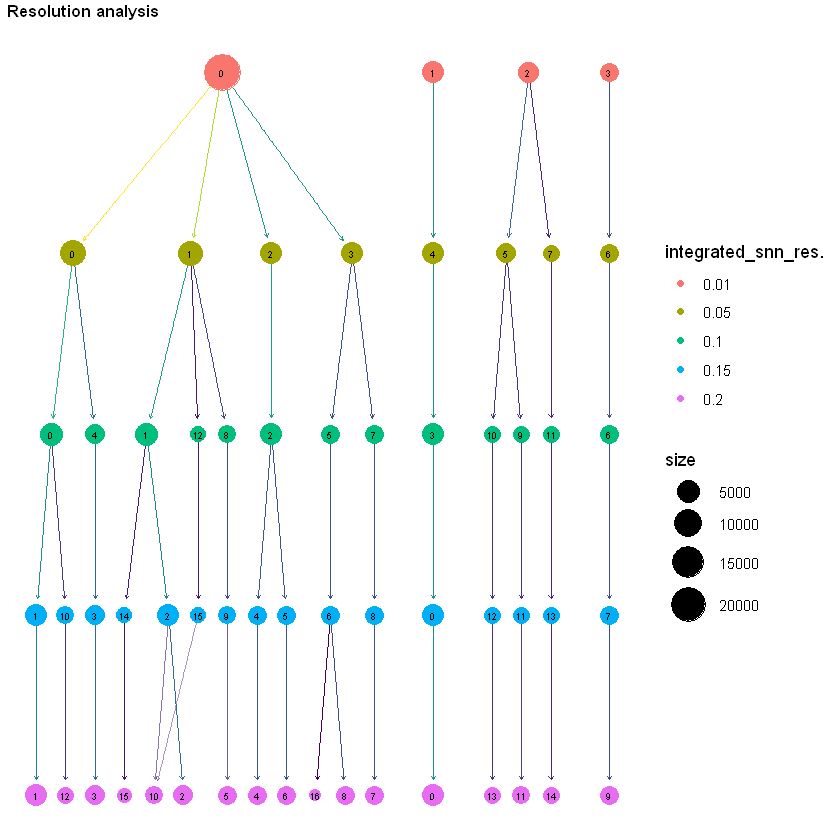

In [10]:
clustree(LS.integrated@meta.data, prefix = "integrated_snn_res.", legend.position='bottom', edge_width = 0.5, node_size_range=c(3,10),node_text_size = 2, layout='tree') +
guides(edge_colour = FALSE, edge_alpha = FALSE, fill=guide_legend(title="resolution")) +
theme(plot.title=element_text(size=10))+
ggtitle('Resolution analysis')
ggsave(file="/resolution_clustree_final.pdf",width=6,height=5)

In [ ]:
DimPlot(object = LS.integrated, reduction = "umap", group.by = "integrated_snn_res.0.2", label = TRUE, repel = TRUE, pt.size = 0.65) +
theme_classic() + 
NoLegend()+
theme(plot.title=element_blank(),
     axis.line=element_blank(),
     axis.text=element_blank(),
     axis.title=element_blank(),
     axis.ticks=element_blank())
ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter1/Neurons_umap_number.png",width=10,height=10)

In [ ]:
DefaultAssay(LS.integrated) <- "RNA"

In [ ]:
#  gaba
F<-FeaturePlot(object =LS.integrated, features = c("Slc32a1","Slc17a6","Slc17a7","Slc18a2"))
ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter1/feature_plots/feature_selection_vesicletransporters.png",width=10,height=10)
#ggsave(file="/Users/stuberadmin/Documents/scRNAseq/191204/Neurons_only_iter3/feature_selection_vesicletransporters.svg")

In [ ]:
saveRDS(LS.integrated, file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter1/LS_integrated.rds")
saveRDS(LS_sal, file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter1/LS_sal.rds")
saveRDS(LS_mor, file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter1/LS_mor.rds")
saveRDS(LS_nal, file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter1/LS_nal.rds")
saveRDS(LS_one_mor, file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter1/LS_one_mor.rds")
saveRDS(LS_nal_no_mor, file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter1/LS_nal_no_mor.rds")

#### Loading in processed .rds files

In [ ]:
LS.integrated<-readRDS(file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter1/LS_integrated.rds")
LS_sal<-readRDS(file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter1/LS_sal.rds")
LS_mor<-readRDS(file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter1/LS_mor.rds")
LS_nal<-readRDS(file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter1/LS_nal.rds")
LS_one_mor<-readRDS( file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter1/LS_one_mor.rds")
LS_nal_no_mor<-readRDS( file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter1/LS_nal_no_mor.rds")

#### Name cell clusters

In [ ]:
new.ident <- c("Gaba1","Gaba2","Gaba3","Gaba4","Gaba5","Gaba6","Gaba7","Gaba8","Gaba9","Glu1","Gaba10","Gaba11","Gaba12","Gaba13","Glu2","Gaba13","Gaba14")
names(x = new.ident) <- levels(x =LS.integrated)
LS.integrated<- RenameIdents(object =LS.integrated, new.ident)

In [ ]:
D <- DimPlot(object = LS.integrated, reduction = "umap", label = TRUE, repel = TRUE, label.size=4)
D+ theme_classic() + NoLegend() +
theme(axis.line=element_blank(),
     axis.text=element_blank(),
     axis.title=element_blank(),
     axis.ticks=element_blank())
ggsave(file="/Umap_name.pdf",width=5,height=5)

In [ ]:
mito.features <- grep(pattern = "^mt-", x = rownames(x =LS.integrated), value = TRUE)
percent.mito <- Matrix::colSums(x = GetAssayData(object = LS.integrated, slot = 'counts')[mito.features, ]) / Matrix::colSums(x = GetAssayData(object = LS.integrated, slot = 'counts'))
LS.integrated[['percent.mito']] <- percent.mito

#### Generate variables for barcodes of each cell cluster

In [ ]:
table(Idents(LS.integrated))

In [ ]:
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(LS.integrated@assays$RNA@data[,which(Idents(object=LS.integrated) %in% new.ident[i])]))# this gives all barcodes in cluster
assign(paste(new.ident[i],"_barcode_LS_sal",sep=""),intersect(colnames(LS_sal@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_LS_mor",sep=""),intersect(colnames(LS_mor@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_LS_nal",sep=""),intersect(colnames(LS_nal@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_LS_one_mor",sep=""),intersect(colnames(LS_one_mor@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_LS_nal_no_mor",sep=""),intersect(colnames(LS_nal_no_mor@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
}

In [ ]:
#creating vector of variable names
barcode_names <- unique(paste(Idents(LS.integrated),"_barcode",sep=""))

In [ ]:
celltype<-vector()
for (i in 1:dim(LS.integrated@meta.data)[1]){
    celltype[i]<-toString(new.ident[LS.integrated@meta.data$integrated_snn_res.0.2[i]])
}
LS.integrated@meta.data$celltype<-celltype

#### Quick quality metric assessment

In [ ]:
VlnPlot(LS.integrated, feature=c('nCount_RNA'))

In [ ]:
VlnPlot(LS.integrated, feature=c('nCount_feature'))

In [ ]:
VlnPlot(LS.integrated, feature=c('percent.mito'))

Gaba1 has low RNA and feature enrichment, and slightly elevated percent mito. We decided to toss this cell cluster because of low sequencing coverage

#### Identifying conserved markers for each cell type

In [ ]:
DefaultAssay(LS.integrated) <- "SCT"

In [ ]:
LS.integrated_corrected <- PrepSCTFindMarkers(LS.integrated)

Code will iterate through all cell clusters to identify genes that distinguish 1 cell cluster from all other cells

In [ ]:
#conserved markers per cluster
#LS_sal_p_val_adj<0.05 & LS_mor_p_val_adj<0.05 & LS_nal_p_val_adj<0.05 & LS_one_mor_p_val_adj<0.05 & LS_nal_no_mor_p_val_adj<0.05
Cell_type<-c("Gaba1","Gaba2","Gaba3","Gaba4","Gaba5","Gaba6","Gaba7","Gaba8","Gaba9","Glu1","Gaba10","Gaba11","Gaba12","Gaba13","Glu2","Gaba13","Gaba14")
for (i in 1:length(Cell_type)){
one.markers <- FindConservedMarkers(LS.integrated_corrected, ident.1 = Cell_type[i], grouping.var = "stim",print.bar = FALSE, assay="SCT")
one.markers<-subset(one.markers, LS_sal_avg_log2FC>0 & LS_mor_avg_log2FC>0 & LS_nal_avg_log2FC>0 & LS_one_mor_avg_log2FC>0 & LS_nal_no_mor_avg_log2FC>0)
sort_marker<-one.markers[order(-one.markers["LS_sal_avg_log2FC"]),]
write.xlsx(sort_marker,file=(paste("/conserved_markers/",Cell_type[i],"_gene_assay_SCT.xlsx",sep="")))}

Gaba11 and Gaba13 were enriched for Apoe and Mog, respectively, which means they are not as likely to be purely neurons. For this reason, they were also removed from the dataset

#### Kicking out cell clusters that were deemed to be either low quality or contamination 

In [ ]:
Remove_barcode<- c(Gaba1_barcode, Gaba11_barcode, Gaba13_barcode)
Retained_barcode_LS_sal <- subset(LS_sal, cells=Remove_barcode,invert=TRUE)
Retained_barcode_LS_mor <- subset(LS_mor, cells=Remove_barcode,invert=TRUE)
Retained_barcode_LS_nal <- subset(LS_nal, cells=Remove_barcode,invert=TRUE)
Retained_barcode_LS_one_mor <- subset(LS_one_mor, cells=Remove_barcode,invert=TRUE)
Retained_barcode_LS_nal_no_mor <- subset(LS_nal_no_mor, cells=Remove_barcode,invert=TRUE)

In [ ]:
saveRDS(Retained_barcode_LS_sal, file="/retained_LS_sal_id.rds")
saveRDS(Retained_barcode_LS_mor, file="/retained_LS_mor_id.rds")
saveRDS(Retained_barcode_LS_nal, file="/retained_LS_nal_id.rds")
saveRDS(Retained_barcode_LS_nal_no_mor, file="/retained_LS_nal_no_mor_id.rds")
saveRDS(Retained_barcode_LS_one_mor, file="/retained_LS_one_mor_id.rds")

## Second clustering iteration with "cleaned" version of the data

Saline (control) group

In [ ]:
LS_sal.data <-Read10X(data.dir = "/Users/stuberadmin/Documents/scRNAseq/201130/30-434124718/01_analysis/cellranger_count/LS-SAL-1/raw_feature_bc_matrix")
colnames(LS_sal.data) = paste0(colnames(LS_sal.data),"LS_sal")
LS_sal<- CreateSeuratObject(counts = LS_sal.data, min.cells = 3, min.features = 200, project = "LS_morphine")
new_LS_barcodes <- gsub("-1","",colnames(LS_sal))
LS_sal <- RenameCells(LS_sal, new.names = new_LS_barcodes)
LS_sal@meta.data$stim <- "LS_sal"
Neuron_id<-colnames(Retained_barcode_LS_sal)
LS_sal<-subset(x = LS_sal, cells=Neuron_id)

Chronic morphine group

In [ ]:
LS_mor.data <-Read10X(data.dir = "/Users/stuberadmin/Documents/scRNAseq/201130/30-434124718/01_analysis/cellranger_count/LS-MOR-1/raw_feature_bc_matrix")
colnames(LS_mor.data) = paste0(colnames(LS_mor.data),"LS_mor")
LS_mor<- CreateSeuratObject(counts = LS_mor.data, min.cells = 3, min.features = 200, project = "LS_morphine")
new_LS_barcodes <- gsub("-1","",colnames(LS_mor))
LS_mor <- RenameCells(LS_mor, new.names = new_LS_barcodes)
LS_mor@meta.data$stim <- "LS_mor"
Neuron_id<- colnames(Retained_barcode_LS_mor)
LS_mor<-subset(x = LS_mor, cells=Neuron_id)

Precipitated withdrawal (chronic morphine + naloxone)

In [ ]:
LS_nal.data <-Read10X(data.dir = "/Users/stuberadmin/Documents/scRNAseq/201130/30-434124718/01_analysis/cellranger_count/LS-NAL-1/raw_feature_bc_matrix")
colnames(LS_nal.data) = paste0(colnames(LS_nal.data),"LS_nal")
LS_nal<- CreateSeuratObject(counts = LS_nal.data, min.cells = 3, min.features = 200, project = "LS_morphine")
new_LS_barcodes <- gsub("-1","",colnames(LS_nal))
LS_nal <- RenameCells(LS_nal, new.names = new_LS_barcodes)
LS_nal@meta.data$stim <- "LS_nal"
Neuron_id<- colnames(Retained_barcode_LS_nal)
LS_nal<-subset(x = LS_nal, cells=Neuron_id)

Acute morphine 

In [ ]:
LS_one_mor.data <-Read10X(data.dir = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS/raw_data/Mor_single/analysis")
colnames(LS_one_mor.data) = paste0(colnames(LS_one_mor.data),"LS_one_mor")
LS_one_mor<- CreateSeuratObject(counts = LS_one_mor.data, min.cells = 3, min.features = 200, project = "LS_morphine")
new_LS_barcodes <- gsub("-1","",colnames(LS_one_mor))
LS_one_mor <- RenameCells(LS_one_mor, new.names = new_LS_barcodes)
LS_one_mor@meta.data$stim <- "LS_one_mor"
Neuron_id<-colnames(Retained_barcode_LS_one_mor)
LS_one_mor<-subset(x = LS_one_mor, cells=Neuron_id)

Acute naloxone (drug naive)

In [ ]:
LS_nal_no_mor.data <-Read10X(data.dir = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS/raw_data/Nal_no_mor/analysis")
colnames(LS_nal_no_mor.data) = paste0(colnames(LS_nal_no_mor.data),"LS_nal_no_mor")
LS_nal_no_mor<- CreateSeuratObject(counts = LS_nal_no_mor.data, min.cells = 3, min.features = 200, project = "LS_morphine")
new_LS_barcodes <- gsub("-1","",colnames(LS_nal_no_mor))
LS_nal_no_mor <- RenameCells(LS_nal_no_mor, new.names = new_LS_barcodes)
LS_nal_no_mor@meta.data$stim <- "LS_nal_no_mor"
Neuron_id<-colnames(Retained_barcode_LS_nal_no_mor)
LS_nal_no_mor<-subset(x = LS_nal_no_mor, cells=Neuron_id)

Add % mito enrichment to metadata

In [ ]:
mito.features <- grep(pattern = "^mt-", x = rownames(x =LS_sal), value = TRUE)
percent.mito <- Matrix::colSums(x = GetAssayData(object = LS_sal, slot = 'counts')[mito.features, ]) / Matrix::colSums(x = GetAssayData(object = LS_sal, slot = 'counts'))
LS_sal[['percent.mito']] <- percent.mito

In [ ]:
mito.features <- grep(pattern = "^mt-", x = rownames(x =LS_mor), value = TRUE)
percent.mito <- Matrix::colSums(x = GetAssayData(object = LS_mor, slot = 'counts')[mito.features, ]) / Matrix::colSums(x = GetAssayData(object = LS_mor, slot = 'counts'))
LS_mor[['percent.mito']] <- percent.mito

In [ ]:
mito.features <- grep(pattern = "^mt-", x = rownames(x =LS_nal), value = TRUE)
percent.mito <- Matrix::colSums(x = GetAssayData(object = LS_nal, slot = 'counts')[mito.features, ]) / Matrix::colSums(x = GetAssayData(object = LS_nal, slot = 'counts'))
LS_nal[['percent.mito']] <- percent.mito

In [ ]:
mito.features <- grep(pattern = "^mt-", x = rownames(x =LS_one_mor), value = TRUE)
percent.mito <- Matrix::colSums(x = GetAssayData(object = LS_one_mor, slot = 'counts')[mito.features, ]) / Matrix::colSums(x = GetAssayData(object = LS_one_mor, slot = 'counts'))
LS_one_mor[['percent.mito']] <- percent.mito

In [ ]:
mito.features <- grep(pattern = "^mt-", x = rownames(x =LS_nal_no_mor), value = TRUE)
percent.mito <- Matrix::colSums(x = GetAssayData(object = LS_nal_no_mor, slot = 'counts')[mito.features, ]) / Matrix::colSums(x = GetAssayData(object = LS_nal_no_mor, slot = 'counts'))
LS_nal_no_mor[['percent.mito']] <- percent.mito

#### Sample normalization using scTransform, followed by dimensionality reduction and clustering

In [ ]:
library('sctransform')

In [ ]:
LS.list<-objects()
LS.list$LS_sal<-LS_sal
LS.list$LS_mor<-LS_mor
LS.list$LS_nal<-LS_nal
LS.list$LS_one_mor<-LS_one_mor
LS.list$LS_nal_no_mor<-LS_nal_no_mor

In [ ]:
reference.list <- LS.list[c("LS_sal","LS_mor","LS_nal","LS_one_mor","LS_nal_no_mor")]

In [ ]:
reference.list <- lapply(X = reference.list, FUN = SCTransform)

In [ ]:
features <- SelectIntegrationFeatures(object.list = reference.list, nfeatures = 3000)

In [ ]:
reference.list <- PrepSCTIntegration(object.list = reference.list, anchor.features = features)

In [ ]:
LS.anchors <- FindIntegrationAnchors(object.list = reference.list, normalization.method = "SCT",
    anchor.features = features)

In [ ]:
LS.integrated <- IntegrateData(anchorset = LS.anchors, normalization.method = "SCT")

In [ ]:
LS.integrated <- RunPCA(LS.integrated, verbose = FALSE, dims=1:30)

In [ ]:
LS.integrated <- RunUMAP(LS.integrated, reduction = "pca", dims = 1:30)

In [ ]:
library(ggplot2)
library(cowplot)

In [ ]:
DimPlot(object = LS.integrated, reduction = "umap", group.by = "stim", repel = TRUE, pt.size = 0.20, label.size=2.5) +
theme_classic() + 
theme(plot.title=element_blank(),
     axis.line=element_blank(),
     axis.text=element_blank(),
     axis.title=element_blank(),
     axis.ticks=element_blank())
ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/Neurons_int_umap.png",width=6,height=4)
ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/Neurons_int_umap.svg")

In [ ]:
saveRDS(LS.integrated, file='C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS.integrated_PCA')

#### Identifying suitable number of final cell clusters

In [44]:
LS.integrated <- readRDS(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rV4/Neurons_only_iter2/LS.integrated_PCA")

In [45]:
LS.integrated <- FindNeighbors(object = LS.integrated, dims=1:30)

Computing nearest neighbor graph

Computing SNN



In [ ]:
LS.integrated <- FindClusters(LS.integrated, resolution = 0.2, dims.use = 1:30)

In [34]:
LS.integrated <- FindClusters(LS.integrated, resolution = 0.05, dims.use = 1:30)

Warning message:
"The following arguments are not used: dims.use"
Suggested parameter: dims instead of dims.use


Warning message:
"The following arguments are not used: dims.use"
Suggested parameter: dims instead of dims.use




Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 25607
Number of edges: 976798

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9773
Number of communities: 7
Elapsed time: 2 seconds


In [46]:
LS.integrated <- FindNeighbors(object = LS.integrated, dims=1:30)

Computing nearest neighbor graph

Computing SNN



In [4]:
set.seed(5)

In [47]:
#For clustree analysis
LS.integrated <- FindClusters(LS.integrated, resolution = 0.01, dims.use = 1:30)
LS.integrated <- FindClusters(LS.integrated, resolution = 0.025, dims.use = 1:30)
LS.integrated <- FindClusters(LS.integrated, resolution = 0.05, dims.use = 1:30)
LS.integrated <- FindClusters(LS.integrated, resolution = 0.10, dims.use = 1:30)
LS.integrated <- FindClusters(LS.integrated, resolution = 0.15, dims.use = 1:30)
LS.integrated <- FindClusters(LS.integrated, resolution = 0.20, dims.use = 1:30)

Warning message:
"The following arguments are not used: dims.use"
Suggested parameter: dims instead of dims.use


Warning message:
"The following arguments are not used: dims.use"
Suggested parameter: dims instead of dims.use




Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 25607
Number of edges: 976798

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9916
Number of communities: 3
Elapsed time: 2 seconds


Warning message:
"The following arguments are not used: dims.use"
Suggested parameter: dims instead of dims.use


Warning message:
"The following arguments are not used: dims.use"
Suggested parameter: dims instead of dims.use




Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 25607
Number of edges: 976798

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9835
Number of communities: 5
Elapsed time: 2 seconds


Warning message:
"The following arguments are not used: dims.use"
Suggested parameter: dims instead of dims.use


Warning message:
"The following arguments are not used: dims.use"
Suggested parameter: dims instead of dims.use




Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 25607
Number of edges: 976798

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9773
Number of communities: 7
Elapsed time: 2 seconds


Warning message:
"The following arguments are not used: dims.use"
Suggested parameter: dims instead of dims.use


Warning message:
"The following arguments are not used: dims.use"
Suggested parameter: dims instead of dims.use




Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 25607
Number of edges: 976798

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9709
Number of communities: 11
Elapsed time: 2 seconds


Warning message:
"The following arguments are not used: dims.use"
Suggested parameter: dims instead of dims.use


Warning message:
"The following arguments are not used: dims.use"
Suggested parameter: dims instead of dims.use




Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 25607
Number of edges: 976798

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9660
Number of communities: 13
Elapsed time: 2 seconds


Warning message:
"The following arguments are not used: dims.use"
Suggested parameter: dims instead of dims.use


Warning message:
"The following arguments are not used: dims.use"
Suggested parameter: dims instead of dims.use




Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 25607
Number of edges: 976798

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9617
Number of communities: 14
Elapsed time: 2 seconds


Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."


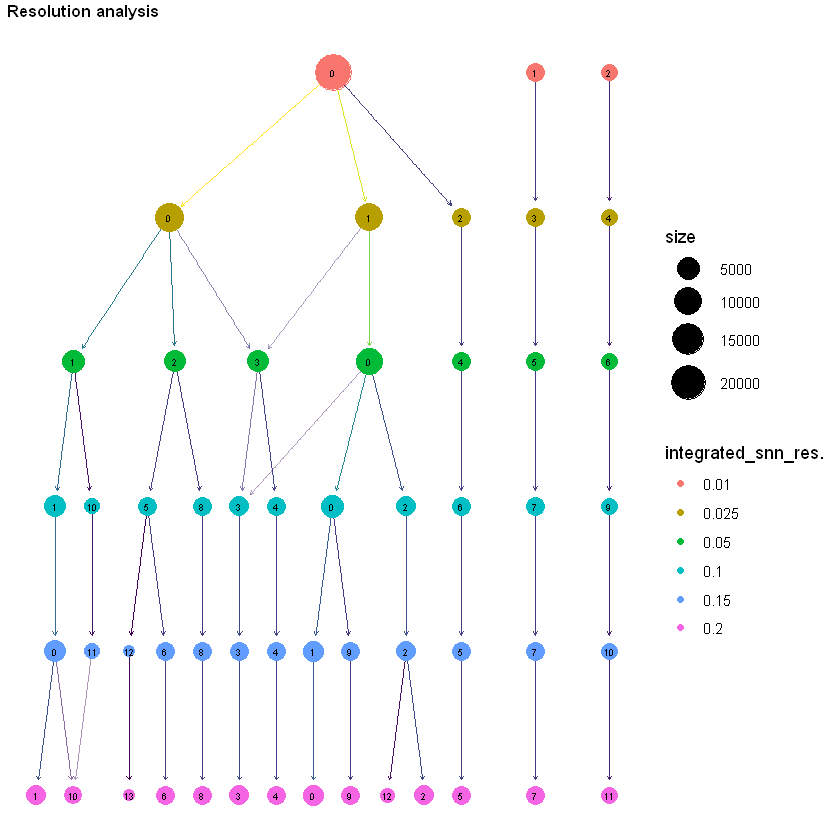

In [25]:
clustree(LS.integrated@meta.data, prefix = "integrated_snn_res.", legend.position='bottom', edge_width = 0.5, node_size_range=c(3,10),node_text_size = 2, layout='tree') +
guides(edge_colour = FALSE, edge_alpha = FALSE, fill=guide_legend(title="resolution")) +
theme(plot.title=element_text(size=10))+
ggtitle('Resolution analysis')
ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rV4/Neurons_only_iter2/resolution_clustree.pdf",width=6,height=5)

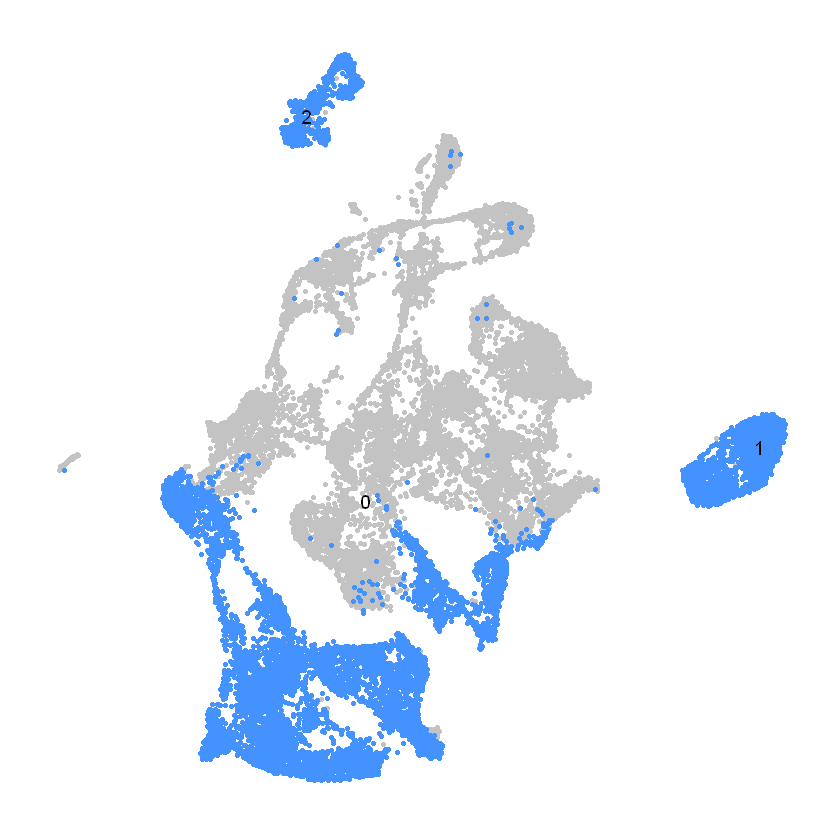

In [67]:
DimPlot(object = LS.integrated, reduction = "umap", group.by = "integrated_snn_res.0.01", label = TRUE, repel = TRUE, pt.size = 1, cells.highlight=c(Glu1_barcode, Glu2_barcode, Gaba1_barcode), cols.highlight=c('#4392FE', 'red')) +
theme_classic() + 
NoLegend()+
theme(plot.title=element_blank(),
     axis.line=element_blank(),
     axis.text=element_blank(),
     axis.title=element_blank(),
     axis.ticks=element_blank())
#ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/Neurons_umap_number_res001.pdf",width=10,height=10)
#ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/Neurons_umap_number_res001.png",width=10,height=10)

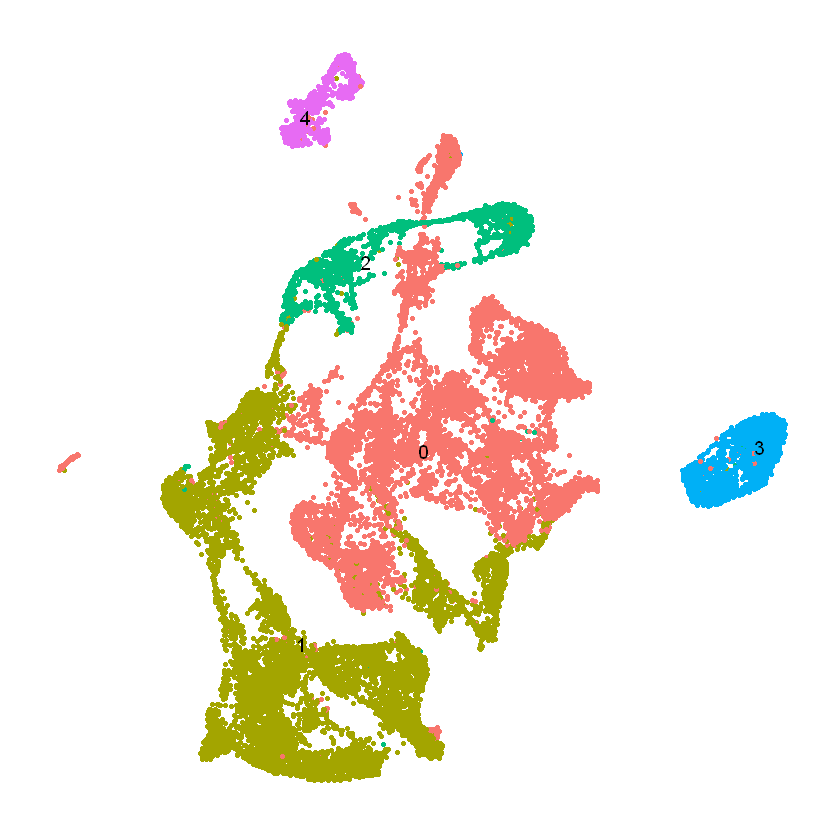

In [54]:
DimPlot(object = LS.integrated, reduction = "umap", group.by = "integrated_snn_res.0.025", label = TRUE, repel = TRUE, pt.size = 1) +
theme_classic() + 
NoLegend()+
theme(plot.title=element_blank(),
     axis.line=element_blank(),
     axis.text=element_blank(),
     axis.title=element_blank(),
     axis.ticks=element_blank())
ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/Neurons_umap_number_res0025.pdf",width=10,height=10)
ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/Neurons_umap_number_res0025.png",width=10,height=10)

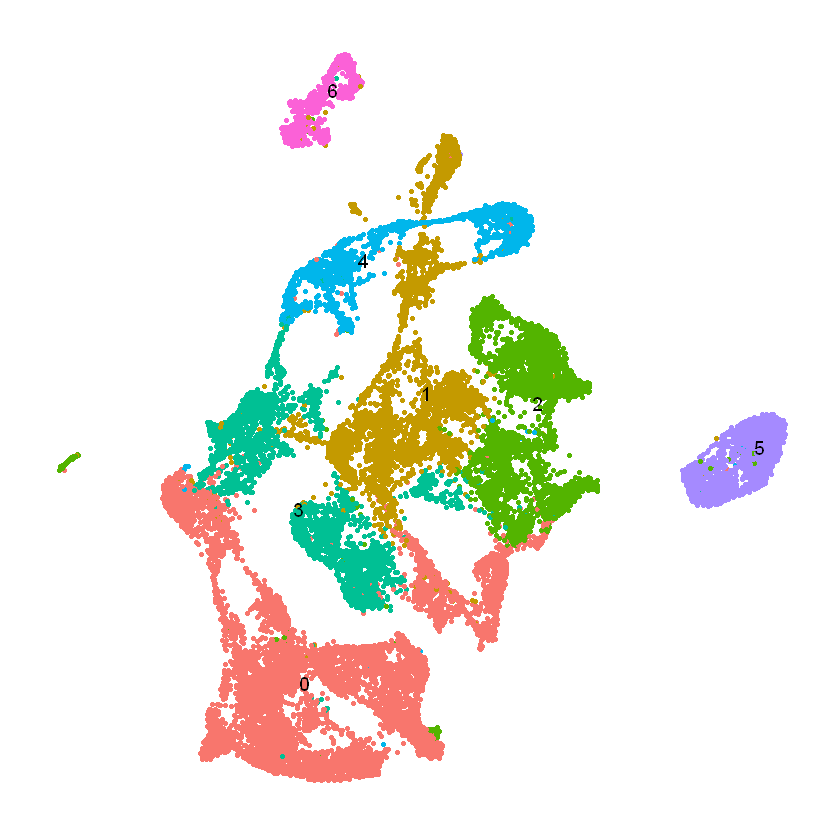

In [55]:
DimPlot(object = LS.integrated, reduction = "umap", group.by = "integrated_snn_res.0.05", label = TRUE, repel = TRUE, pt.size = 1) +
theme_classic() + 
NoLegend()+
theme(plot.title=element_blank(),
     axis.line=element_blank(),
     axis.text=element_blank(),
     axis.title=element_blank(),
     axis.ticks=element_blank())
ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/Neurons_umap_number_res05.pdf",width=10,height=10)
ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/Neurons_umap_number_res05.png",width=10,height=10)

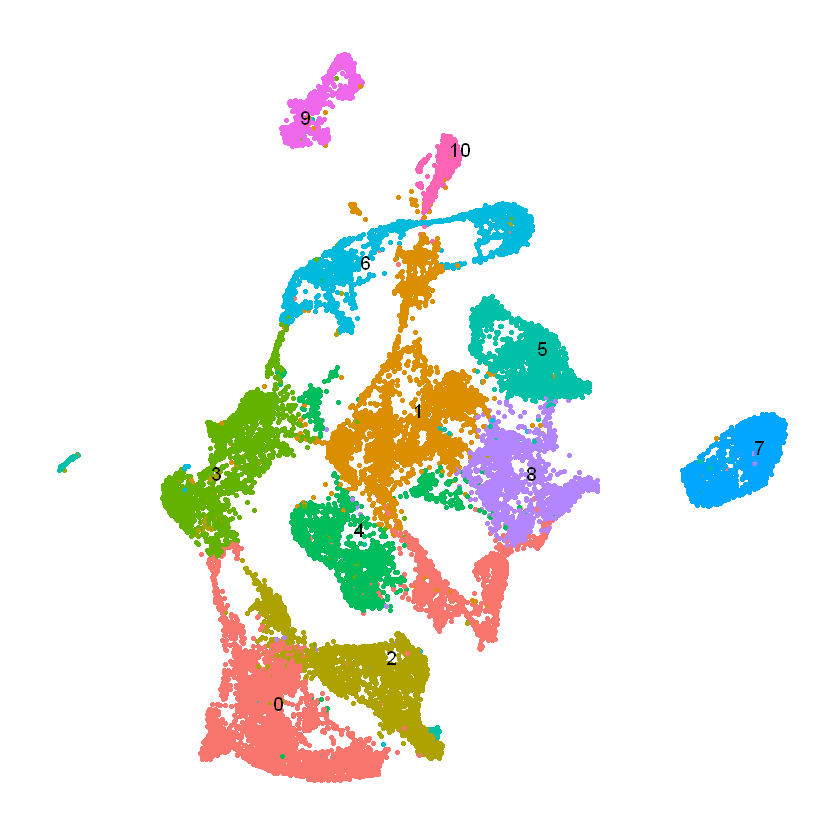

In [56]:
DimPlot(object = LS.integrated, reduction = "umap", group.by = "integrated_snn_res.0.1", label = TRUE, repel = TRUE, pt.size = 1) +
theme_classic() + 
NoLegend()+
theme(plot.title=element_blank(),
     axis.line=element_blank(),
     axis.text=element_blank(),
     axis.title=element_blank(),
     axis.ticks=element_blank())
ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/Neurons_umap_number_res01.pdf",width=10,height=10)
ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/Neurons_umap_number_res01.png",width=10,height=10)

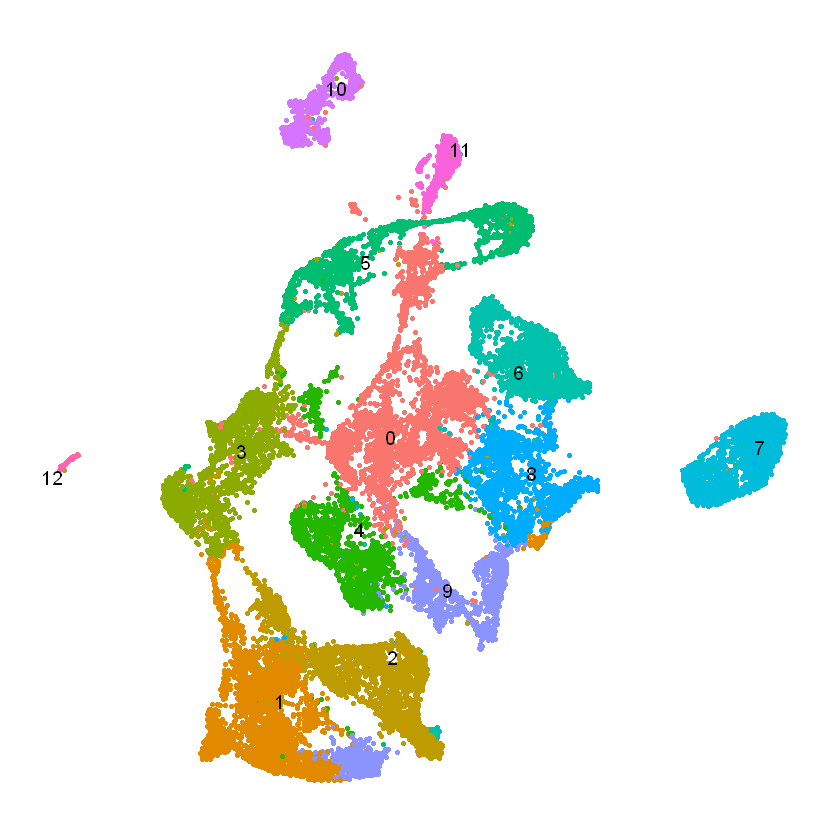

In [57]:
DimPlot(object = LS.integrated, reduction = "umap", group.by = "integrated_snn_res.0.15", label = TRUE, repel = TRUE, pt.size = 1) +
theme_classic() + 
NoLegend()+
theme(plot.title=element_blank(),
     axis.line=element_blank(),
     axis.text=element_blank(),
     axis.title=element_blank(),
     axis.ticks=element_blank())
ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/Neurons_umap_number_res015.pdf",width=10,height=10)
ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/Neurons_umap_number_res015.png",width=10,height=10)

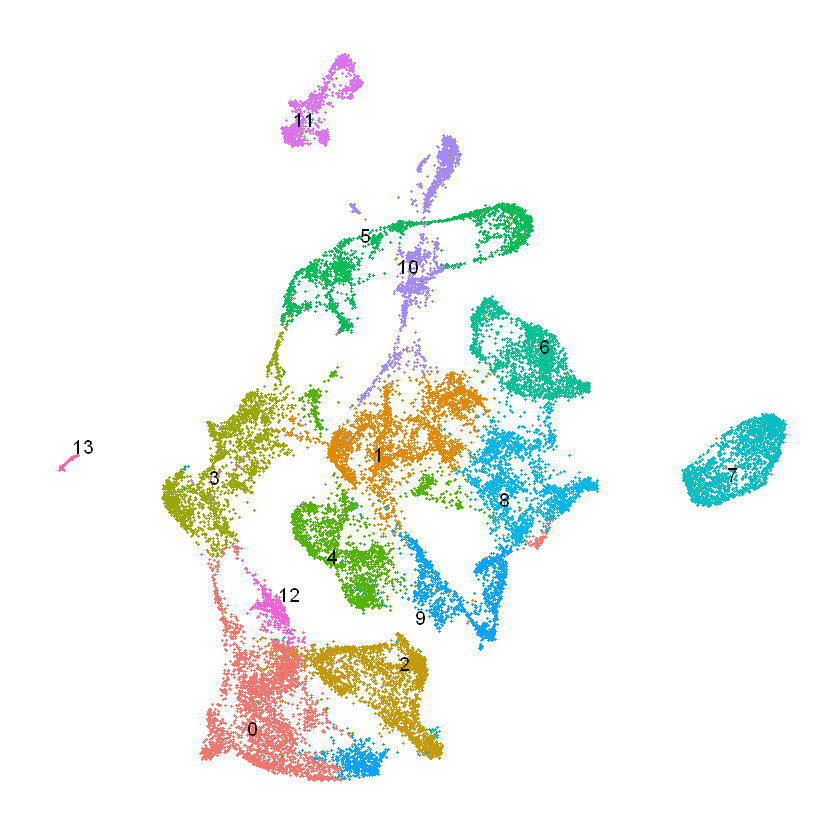

In [19]:
DimPlot(object = LS.integrated, reduction = "umap", group.by = "integrated_snn_res.0.2", label = TRUE, repel = TRUE, pt.size = 0.65) +
theme_classic() + 
NoLegend()+
theme(plot.title=element_blank(),
     axis.line=element_blank(),
     axis.text=element_blank(),
     axis.title=element_blank(),
     axis.ticks=element_blank())
#ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/Neurons_umap_number.pdf",width=10,height=10)
#ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/Neurons_umap_number.png",width=10,height=10)

In [ ]:
DimPlot(object = LS.integrated, reduction = "umap", group.by = "integrated_snn_res.0.2", label = TRUE, repel = TRUE, pt.size = 0.65) +
theme_classic() + 
NoLegend()+
theme(plot.title=element_blank(),
     axis.line=element_blank(),
     axis.text=element_blank(),
     axis.title=element_blank(),
     axis.ticks=element_blank())
ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/Neurons_umap_number.pdf",width=10,height=10)
ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/Neurons_umap_number.png",width=10,height=10)

In [ ]:
DefaultAssay(LS.integrated) <- "RNA"

In [ ]:
#  gaba
F<-FeaturePlot(object =LS.integrated, features = c("Slc32a1","Slc17a6","Slc17a7","Slc18a2"))
ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/feature_plots/feature_selection_vesicletransporters.pdf",width=10,height=10)
#ggsave(file="/Users/stuberadmin/Documents/scRNAseq/191204/Neurons_only_iter3/feature_selection_vesicletransporters.svg")

Saving final .rds files for further analysis

In [ ]:
saveRDS(LS.integrated, file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_integrated.rds")
saveRDS(LS_sal, file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_sal.rds")
saveRDS(LS_mor, file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_mor.rds")
saveRDS(LS_nal, file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_nal.rds")
saveRDS(LS_one_mor, file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_one_mor.rds")
saveRDS(LS_nal_no_mor, file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_nal_no_mor.rds")